In [1]:
import tensorflow as tf, os, pandas as pd, numpy as np, pickle, glob
from sklearn.model_selection import KFold
os.environ["CUDA_VISIBLE_DEVICES"] = "6"

2023-04-04 10:59:12.326208: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-04 10:59:12.455144: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-04 10:59:13.049154: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-04-04 10:59:13.049221: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] 

In [2]:
USD_data_train_pkl = glob.glob("/ssd8/chih/project/yadong/predict_baseline_version01/dataset/PeriHD_pickle_save/USD_sample2693_only-merge-sequence_fullcontext/train/*.pkl")
USD_data_test_pkl = glob.glob("/ssd8/chih/project/yadong/predict_baseline_version01/dataset/PeriHD_pickle_save/USD_sample2693_only-merge-sequence_fullcontext/test/*.pkl")

In [3]:
def pk2pf(pkl_list):
    data_train = []
    for pk in pkl_list:
        with open(pk, 'rb') as f:
            pk_dict = pickle.load(f)
        data_train.append(pk_dict)
    data_train = pd.DataFrame(data_train)
    
    return data_train
USD_data_train = pk2pf(USD_data_train_pkl)
USD_data_test = pk2pf(USD_data_test_pkl)

In [4]:
# USD_data_train_embedding = np.array(USD_data_train['full_embed'].tolist())
USD_data_test_embedding = np.array(USD_data_test['full_embed'].tolist())

/tmp/ipykernel_75336/3208931757.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  USD_data_test_embedding = np.array(USD_data_test['full_embed'].tolist())


In [5]:
# print(len(USD_data_train.label.values)-sum(USD_data_train.label.values), sum(USD_data_train.label.values))
print(len(USD_data_test.label.values)-sum(USD_data_test.label.values), sum(USD_data_test.label.values))

74 26


In [6]:
import keras
def create_model(input_shape = (1024,)):
  model = tf.keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape = input_shape),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
  ])
  model.compile(loss='binary_crossentropy', 
              optimizer='adam',
              metrics=['acc'])
  return model

2023-04-04 10:59:14.792919: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-04 10:59:15.406018: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22288 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:23:00.0, compute capability: 8.6
0it [00:00, ?it/s]2023-04-04 10:59:16.727527: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
100it [00:06, 15.78it/s]
100it [00:05, 17.84it/s]
100it [00:05, 18.28it/s]
100it [00:05, 18.97it/s]
100it [00:05, 17.94it/s]
No artists with labels found to put in legend.  N

Text(0.5, 1.0, '[External][USD]PeriHD full-sentence ROC-Curve')

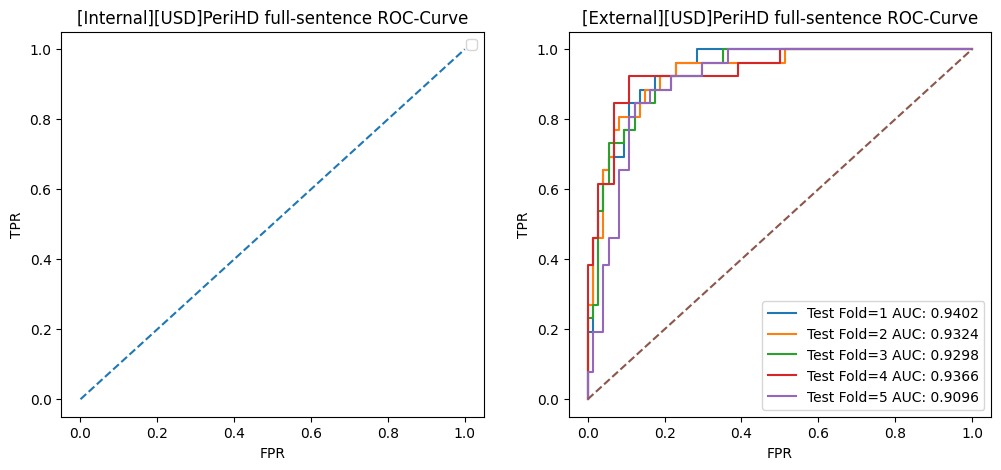

In [7]:
from sklearn.metrics import classification_report, roc_curve, precision_recall_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
import matplotlib.pylab as plt
from tqdm import tqdm
def get_weight_path(fold, train_type):
    # return './model_weight/weights_periHD_KFold={}[Fusion].h5'.format(fold)
    return './model_weight/PeriHD/weights_periHD_KFold={}[{}-only-merge-sequnece-resplit].h5'.format(fold,train_type)
kfold = KFold(n_splits=5, shuffle=True)
gt_in = USD_data_test.label.values
gt_ex = USD_data_test.label.values
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
CM_internal = []
CM_external = []
train_type = 'USD'
input_shape  = (512,)
Fusion_intranal_embeddings = USD_data_test_embedding
Fusion_external_validation_embeddings = USD_data_test_embedding
for fold in ['1','2','3','4','5']:
# for fold in ['1']:
    weight_name = get_weight_path(fold, train_type)
    model_cls = create_model(input_shape=input_shape)
    model_cls.load_weights(weight_name)
    # Internal metric
    # split_data_internal = {"pred":[], "truth": []}
    # train_pred_seq_stack =[]
    # for (seq_stack, ans) in tqdm(zip(Fusion_intranal_embeddings, gt_in)):
    #     test_pred = model_cls.predict(seq_stack,verbose=0)
    #     train_pred_seq_stack.append(test_pred)
    #     split_data_internal['pred'].append(np.max(test_pred))
    #     split_data_internal['truth'].append(ans)
    # test_binary_pred1 = (np.array(split_data_internal['pred'])>0.5).astype(np.int8)
    # tn, fp, fn, tp = confusion_matrix(split_data_internal['truth'], test_binary_pred1).ravel()
    # CM_internal.append([tn, fp, fn, tp])
    # fpr, tpr, thresholds = roc_curve(split_data_internal['truth'], split_data_internal['pred'], pos_label=1)
    # auc = roc_auc_score(split_data_internal['truth'], split_data_internal['pred'])
    # axs[0].plot(fpr, tpr, label = "Test Fold={} AUC: {}".format(fold, round(auc, 4)))
    # External metric
    split_data_external = {"pred":[], "truth": [], "index": []}
    test_pred_seq_stack =[]
    for (seq_stack, ans) in tqdm(zip(Fusion_external_validation_embeddings, gt_ex)):
        test_pred = model_cls.predict(seq_stack, verbose=0)
        test_pred_seq_stack.append(test_pred)
        split_data_external['pred'].append(np.max(test_pred))
        split_data_external['index'].append(np.argmax(test_pred))
        split_data_external['truth'].append(ans)
    test_binary_pred2 = (np.array(split_data_external['pred'])>0.5).astype(np.int8)
    tn, fp, fn, tp = confusion_matrix(split_data_external['truth'], test_binary_pred2).ravel()
    CM_external.append([tn, fp, fn, tp])
    fpr, tpr, thresholds = roc_curve(split_data_external['truth'], split_data_external['pred'], pos_label=1)
    auc = roc_auc_score(split_data_external['truth'], split_data_external['pred'])
    axs[1].plot(fpr, tpr, label = "Test Fold={} AUC: {}".format(fold, round(auc, 4)))

axs[0].plot([0,1],[0,1], linestyle='--')
axs[1].plot([0,1],[0,1], linestyle='--')
axs[0].legend()
axs[1].legend()
axs[0].set_xlabel("FPR")
axs[0].set_ylabel("TPR")
axs[1].set_xlabel("FPR")
axs[1].set_ylabel("TPR")
axs[0].set_title(f"[Internal][{train_type}]PeriHD full-sentence ROC-Curve")
axs[1].set_title(f"[External][{train_type}]PeriHD full-sentence ROC-Curve")


In [8]:
false_pred = pd.DataFrame([], columns=['index', 'Pred score', 'Answer', 'Sentence'])
for idx, (ex_ans, ex_pre, ex_index) in enumerate(zip(split_data_external['truth'], split_data_external['pred'],split_data_external['index'])):
    temp = pd.DataFrame([], columns=['index', 'Answer', 'Pred score', 'Sentence'])
    temp['index'] = [idx]
    temp['Answer'] = [ex_ans]
    temp['Pred score'] = [ex_pre]
    temp['Sentence'] = [USD_data_test.iloc[idx].full_text[ex_index]]
    false_pred = pd.concat([false_pred, temp])

In [9]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
false_pred

/tmp/ipykernel_75336/2272201356.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,index,Pred score,Answer,Sentence
0,0,0.938186,0,b-c 5ml at2131透析結束，止血後AVF thrill++
0,1,0.994356,0,今有事提早10分結束透析，無不適自己返家休息.
0,2,0.999948,1,依血壓調整透析速率，至11:10結束透析
0,3,0.986998,0,透析至1700，機器面板顯示脫水量: 2.2 L
0,4,0.999906,1,視血壓情形調整脫水速率，血液流速維持200ml/min
0,5,0.008375,0,AVF已止血thrill++b-complex 3ml iv at11:47
0,6,0.999600,1,訴精神還以先再休息待好轉再拔除針，未改善治急診治療
0,7,0.999702,0,hf clear，透析後無不適
0,8,0.999858,0,AVF已止血，thrill(++)無不適
0,9,0.007477,0,無不適，PERM-CATH GAUZE COVER


In [10]:
# false_pred.to_csv('./False_predict_sentence_data.csv', encoding='utf-8-sig', index=False)

In [11]:
# 已標記資料效能評估
def metric_calc(array_):
    tn, fp, fn, tp = array_
    acc = (tp+tn)/(tp+tn+fn+fp)
    sens = tp/(tp+fn)
    spec = tn/(tn+fp)
    prec = tp/(tp+fp)
    f1 = (2*prec*sens)/(prec+sens)
    return acc, prec, sens, spec, f1

def get_metric(arr):
    mean_arr = np.mean(np.array(arr), axis=0)
    std_arr = np.std(np.array(arr), axis=0)
    return mean_arr, std_arr

In [12]:

# CM_train = np.array(CM_internal)
CM_train = np.array(CM_external)
CM_test = np.array(CM_external)
T_stack, t_stack = [],[]
for T_ in CM_train:
    T_stack.append(metric_calc(T_))
    
for t_ in CM_test:
    t_stack.append(metric_calc(t_))
#內部資料 - Train & Test
mark_train_mean, mark_train_std = get_metric(T_stack)
mark_test_mean, mark_test_std = get_metric(t_stack)
mark_train = pd.DataFrame(['Accuracy','Precision', 'Sensitivity', 'Specificity', 'F1-score'], columns=[f'{train_type} Metric Train'])
for T_, f in zip(T_stack,['fold-1','fold-2','fold-3','fold-4','fold-5']):mark_train[f] = np.round(T_,4)
mark_train['Mean'] = np.round(mark_train_mean,4)
mark_train['Std'] = np.round(mark_train_std,4)

mark_test = pd.DataFrame(['Accuracy','Precision', 'Sensitivity', 'Specificity', 'F1-score'], columns=[f'{train_type} Metric Test'])
for t_, f in zip(t_stack,['fold-1','fold-2','fold-3','fold-4','fold-5']):mark_test[f] = np.round(t_,4)
mark_test['Mean'] = np.round(mark_test_mean,4)
mark_test['Std'] = np.round(mark_test_std,4)

In [13]:
mark_train

,USD Metric Train,fold-1,fold-2,fold-3,fold-4,fold-5,Mean,Std
0,Accuracy,0.4300,0.4400,0.4500,0.4000,0.4200,0.4280,0.0172
1,Precision,0.3133,0.3171,0.3210,0.3023,0.3095,0.3126,0.0064
2,Sensitivity,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000
3,Specificity,0.2297,0.2432,0.2568,0.1892,0.2162,0.2270,0.0232
4,F1-score,0.4771,0.4815,0.4860,0.4643,0.4727,0.4763,0.0075


In [14]:
mark_test

,USD Metric Test,fold-1,fold-2,fold-3,fold-4,fold-5,Mean,Std
0,Accuracy,0.4300,0.4400,0.4500,0.4000,0.4200,0.4280,0.0172
1,Precision,0.3133,0.3171,0.3210,0.3023,0.3095,0.3126,0.0064
2,Sensitivity,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000
3,Specificity,0.2297,0.2432,0.2568,0.1892,0.2162,0.2270,0.0232
4,F1-score,0.4771,0.4815,0.4860,0.4643,0.4727,0.4763,0.0075
